In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_data():
    all_data = []
    for i in range(10,23):
        year = str(2000+i)
        url1 = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/'+year+'/all?type=daily_treasury_yield_curve&field_tdr_date_value='+year+'page&_format=csv'
        
        data = pd.read_csv(url1)
        all_data.append(data)
    pd_alldata = pd.concat(all_data,ignore_index=True)
    pd_alldata['Date'] = pd.to_datetime(pd_alldata['Date'])
    pd_alldata.index = pd_alldata['Date']
    
    req_cols = ['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', 
                '7 Yr','10 Yr', '20 Yr', '30 Yr']
    final = pd_alldata[req_cols]
    return final

In [33]:
df = get_data()
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-12-31,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2010-12-30,0.12,0.20,0.29,0.66,1.07,2.06,2.76,3.38,4.21,4.43
2010-12-29,0.13,0.20,0.30,0.64,1.05,2.03,2.75,3.35,4.19,4.41
2010-12-28,0.15,0.21,0.31,0.75,1.17,2.18,2.89,3.50,4.33,4.53
2010-12-27,0.17,0.22,0.32,0.71,1.11,2.08,2.76,3.36,4.20,4.42


In [34]:
df.to_csv('uts_2022.csv')

In [36]:
df = pd.read_csv('uts_2022.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-12-31,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2010-12-30,0.12,0.20,0.29,0.66,1.07,2.06,2.76,3.38,4.21,4.43
2010-12-29,0.13,0.20,0.30,0.64,1.05,2.03,2.75,3.35,4.19,4.41
2010-12-28,0.15,0.21,0.31,0.75,1.17,2.18,2.89,3.50,4.33,4.53
2010-12-27,0.17,0.22,0.32,0.71,1.11,2.08,2.76,3.36,4.20,4.42


In [37]:
df = df.sort_values(by='Date')
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-01-04,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


In [48]:
# df=df.diff()

In [66]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-01-05,-0.478721,-0.509552,-1.576490,-2.207595,-2.147641,-1.825582,-1.524120,-1.547591,-1.146205,-1.159281
2010-01-06,-0.478721,-0.956182,-0.431798,-0.027825,0.691044,0.799348,0.946875,1.547234,1.726081,2.136840
2010-01-07,-0.478721,0.383709,-0.050234,0.517117,0.454486,0.395513,-0.003508,-0.000178,-0.188776,-0.189834
2010-01-08,-0.056381,-0.509552,-1.194926,-1.935124,-1.437970,-1.017911,-0.383661,-0.387032,-0.188776,0.197945
2010-01-11,-0.478721,-0.956182,-0.813362,-0.300297,-0.255185,0.193595,0.186569,0.386675,0.577167,0.779613


In [67]:
df=df.dropna()
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-01-05,-0.478721,-0.509552,-1.576490,-2.207595,-2.147641,-1.825582,-1.524120,-1.547591,-1.146205,-1.159281
2010-01-06,-0.478721,-0.956182,-0.431798,-0.027825,0.691044,0.799348,0.946875,1.547234,1.726081,2.136840
2010-01-07,-0.478721,0.383709,-0.050234,0.517117,0.454486,0.395513,-0.003508,-0.000178,-0.188776,-0.189834
2010-01-08,-0.056381,-0.509552,-1.194926,-1.935124,-1.437970,-1.017911,-0.383661,-0.387032,-0.188776,0.197945
2010-01-11,-0.478721,-0.956182,-0.813362,-0.300297,-0.255185,0.193595,0.186569,0.386675,0.577167,0.779613


In [68]:
cov_mat = np.cov(df.values.T)
cov_mat

array([[1.00030769, 0.68968044, 0.45617089, 0.29500662, 0.26378111,
        0.20697898, 0.18527883, 0.17961122, 0.16015506, 0.1519595 ],
       [0.68968044, 1.00030769, 0.67326715, 0.49434791, 0.44114225,
        0.3688364 , 0.33206723, 0.30841501, 0.26297721, 0.24624384],
       [0.45617089, 0.67326715, 1.00030769, 0.72347924, 0.66752816,
        0.56634533, 0.50998545, 0.462008  , 0.37471882, 0.35260497],
       [0.29500662, 0.49434791, 0.72347924, 1.00030769, 0.91771713,
        0.84057688, 0.77098932, 0.70449841, 0.58970966, 0.54872471],
       [0.26378111, 0.44114225, 0.66752816, 0.91771713, 1.00030769,
        0.93695163, 0.88132493, 0.81719229, 0.69923184, 0.65364386],
       [0.20697898, 0.3688364 , 0.56634533, 0.84057688, 0.93695163,
        1.00030769, 0.97015381, 0.92613652, 0.8284156 , 0.78359446],
       [0.18527883, 0.33206723, 0.50998545, 0.77098932, 0.88132493,
        0.97015381, 1.00030769, 0.973231  , 0.90244095, 0.86440116],
       [0.17961122, 0.30841501, 0.462008 

In [69]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [70]:
eig_vals.shape

(10,)

In [71]:
eig_vals

array([6.67299617, 1.79914667, 0.76588522, 0.33051748, 0.22605087,
       0.11464848, 0.04581794, 0.01200282, 0.01996206, 0.0160492 ])

In [72]:
idx_ranking = np.argsort(eig_vals)[::-1]
idx_ranking

array([0, 1, 2, 3, 4, 5, 6, 8, 9, 7])

In [73]:
eig_vals = eig_vals[idx_ranking]
eig_vecs = eig_vecs[idx_ranking]

In [74]:
top_3_pcs = eig_vecs[:3]


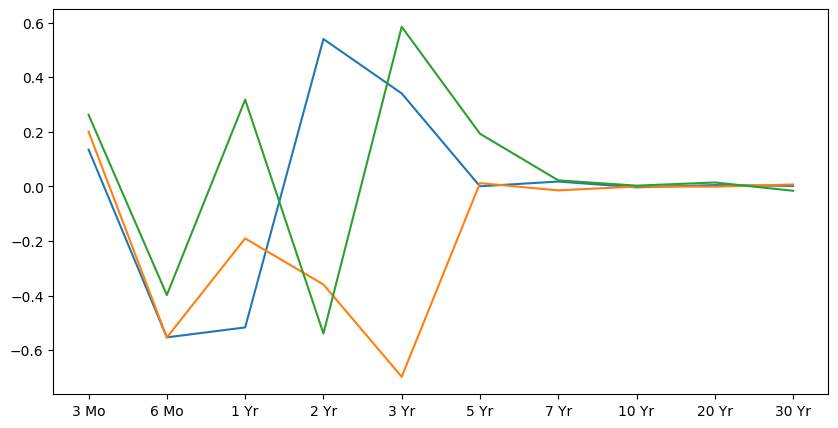

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.columns, eig_vecs[0])
ax.plot(df.columns, eig_vecs[1])
ax.plot(df.columns, eig_vecs[2])
plt.show()

In [76]:
projs = top_3_pcs.dot(df.T)


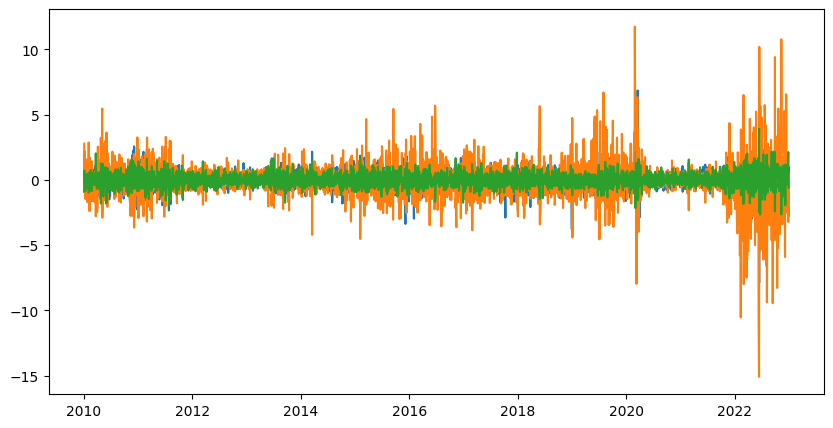

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, projs[0])
ax.plot(df.index, projs[1])
ax.plot(df.index, projs[2])
plt.show()